In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

#데이터 scaling
from sklearn.preprocessing import StandardScaler
#데이터 분할
from sklearn.model_selection import train_test_split
#예측/회귀 KNN
from sklearn.neighbors import KNeighborsRegressor
#최적 모델, 파라미터 탐색
from sklearn.model_selection import GridSearchCV

In [31]:
import matplotlib as mpl
import matplotlib.font_manager as fm
font_location = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_name = fm.FontProperties(fname = font_location).get_name()
mpl.rc('font',family= font_name)
import warnings
warnings.filterwarnings('ignore')

## [체질검사]
#### 체질 비만도를 예측하기 위한 KNN 분석을 실시하고 결과를 해석하시오.
### 1. 데이터 구성하기

In [2]:
#데이터 불러오기
df_raw = pd.read_csv('/home/pirl/Downloads/data2_py/체질검사.csv')
df_raw.head()

,FAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
0,35.2,46,363.15,72.25,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45.0,29.0,21.4
1,11.8,27,168.00,71.25,38.1,93.0,79.1,94.5,57.3,36.2,24.5,29.0,30.0,18.8
2,22.2,69,177.75,68.50,38.7,102.0,95.0,98.3,55.0,38.3,21.8,30.8,25.7,18.8
3,10.6,57,147.75,65.75,35.2,99.6,86.4,90.1,53.0,35.0,21.3,31.7,27.3,16.9
4,47.5,51,219.00,64.00,41.2,119.8,122.1,112.8,62.5,36.9,23.6,34.7,29.1,18.4


In [3]:
#목표변수, 설명변수 데이터 지정
df_raw_y = df_raw['FAT']
df_raw_x = df_raw.drop('FAT',axis=1,inplace=False)

In [4]:
#데이터 분할 (train:test = 7:3)
df_train_x,df_test_x,df_train_y,df_test_y = train_test_split(df_raw_x,df_raw_y,
                                                            test_size=0.3)

print("train data X size : {}".format(df_train_x.shape))
print("train data Y size : {}".format(df_train_y.shape))
print("test data X size : {}".format(df_test_x.shape))
print("test data Y size : {}".format(df_test_y.shape))

train data X size : (176, 13)
train data Y size : (176,)
test data X size : (76, 13)
test data Y size : (76,)


### 2. 모델 생성하기

In [8]:
#기본 옵션으로 생성
knn_uncustomized = KNeighborsRegressor()
knn_uncustomized.fit(df_train_x, df_train_y)

#train 데이터 설명력
print('Score on training set: {:.3f}' .format(knn_uncustomized.score(df_train_x, df_train_y)))
#test 데이터 설명력
print('Score on test set: %.3f' %(knn_uncustomized.score(df_test_x, df_test_y)))

Score on training set: 0.732
Score on test set: 0.512


In [9]:
#현재 생성된 트리 모델의 옵션 확인
knn_uncustomized

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=5, p=2,
          weights='uniform')

In [10]:
##모델 parameter 조정 : 이웃 수 증가에 따른 설명력 변화

#train 및 test 설명력 결과 저장
train_score =[]; test_score=[]
#최대 이웃 수 : 1~15
para_n_neighbors = [i for i in range(1,16)]

for v_n_neighbors in para_n_neighbors:
    knn=KNeighborsRegressor(n_neighbors = v_n_neighbors)
    knn.fit(df_train_x,df_train_y)
    train_score.append(knn.score(df_train_x,df_train_y))
    test_score.append(knn.score(df_test_x,df_test_y))

#결과저장
df_score_knn = pd.DataFrame()
df_score_knn['Neighbors'] = para_n_neighbors
df_score_knn['TrainScore'] = train_score
df_score_knn['TestScore'] = test_score

In [11]:
#모델 설명력  확인
df_score_knn.round(3)

,Neighbors,TrainScore,TestScore
0,1,1.000,0.210
1,2,0.843,0.421
2,3,0.786,0.488
3,4,0.756,0.485
4,5,0.732,0.512
5,6,0.712,0.505
6,7,0.696,0.525
7,8,0.678,0.533
8,9,0.665,0.520
9,10,0.652,0.510


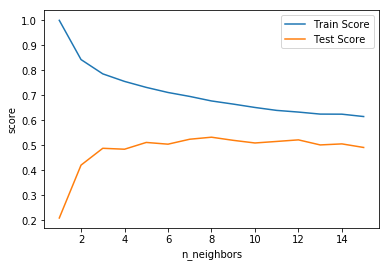

In [12]:
#모델 설명력 그래프 확인
plt.plot(para_n_neighbors, train_score, linestyle='-', label='Train Score')
plt.plot(para_n_neighbors, test_score, linestyle='-', label='Test Score')
plt.ylabel('score');plt.xlabel('n_neighbors')
plt.legend()

K의 증가에 따라 모델의 설명력이 train과 test에 상반되게 나타난다. 두 데이터의 성능 변화를 고려하여 5를 선택한다.

In [13]:
##모델 parameter 조정 : 가중치별 이웃 수 증가에 따른 설명력 변화

#train 및 test 설명력 결과 저장
train_score =[]; test_score=[]
#이웃 수 : 1~10
para_n_neighbors = [i for i in range(1,11)] * 2
#가중치
para_weights = (['uniform']*10)+(['distance']*10)

#zip(list1,list2,...)를 사용하면 list1과 list2의 인덱스별 값을 하나씩 가져옴
for (v_n_neighbors,v_weights) in zip(para_n_neighbors,para_weights):
    knn=KNeighborsRegressor(n_neighbors = v_n_neighbors, weights=v_weights)
    knn.fit(df_train_x,df_train_y)
    train_score.append(knn.score(df_train_x,df_train_y))
    test_score.append(knn.score(df_test_x,df_test_y))

#결과저장
df_score_weight = pd.DataFrame()
df_score_weight['Neighbors'] = para_n_neighbors
df_score_weight['Weights'] = para_weights
df_score_weight['TrainScore'] = train_score
df_score_weight['TestScore'] = test_score

In [17]:
#그림을 그리기 위해 데이터의 형태를 변환
df_score_weight_pivot = df_score_weight.pivot(index='Neighbors',columns='Weights',\
                                             values=['TrainScore','TestScore'])
df_score_weight_pivot.head()

TrainScore           TestScore          
Weights     distance   uniform  distance   uniform
Neighbors                                         
1                1.0  1.000000  0.209691  0.209691
2                1.0  0.843116  0.425962  0.421177
3                1.0  0.786022  0.499560  0.488438
4                1.0  0.755854  0.503464  0.484725
5                1.0  0.731952  0.524348  0.511830

In [18]:
#pivot을 이용할 경우, columns와 values이 2개의 level로 이루어지므로 하나의 level로 변환
level0 = df_score_weight_pivot.columns.get_level_values(0)
level1 = df_score_weight_pivot.columns.get_level_values(1)
df_score_weight_pivot.columns = level0 +'_'+level1
df_score_weight_pivot.head()

,TrainScore_distance,TrainScore_uniform,TestScore_distance,TestScore_uniform
Neighbors,,,,
1,1.0,1.000000,0.209691,0.209691
2,1.0,0.843116,0.425962,0.421177
3,1.0,0.786022,0.499560,0.488438
4,1.0,0.755854,0.503464,0.484725
5,1.0,0.731952,0.524348,0.511830


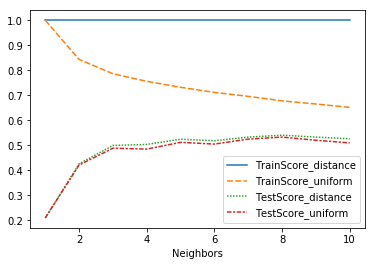

In [19]:
#모델 설명력 그래프 확인
sns.lineplot(data=df_score_weight_pivot)

K의 증가와 가중치 방식에 따라 모델의 설명력이 train 과 test 데이터에서 상반되게 나타난다. (단,distance는 변화 없음)

train/test 데이터의 성능 변화를 고려하여 uniform 을 선택한다.

In [21]:
##모델 parameter 조정 : 거리 계산 방법별 이웃 수 증가에 따른 설명력 ㅂ 녀화

#train 및 test 설명력 결과 저장
train_score =[]; test_score=[]
#이웃 수 : 1~10
para_n_neighbors = [i for i in range(1,11)] * 3
#거리 계산 방법
para_metric = ['minkowski'] * 10 + ['euclidean'] * 10 + ['manhattan'] * 10

for (v_n_neighbors,v_metric) in zip(para_n_neighbors,para_metric):
    knn=KNeighborsRegressor(weights='uniform', \
                            n_neighbors = v_n_neighbors, metric = v_metric)
    knn.fit(df_train_x,df_train_y)
    train_score.append(knn.score(df_train_x,df_train_y))
    test_score.append(knn.score(df_test_x,df_test_y))

#결과저장
df_score_metric = pd.DataFrame()
df_score_metric['Neighbors'] = para_n_neighbors
df_score_metric['Metric'] = para_metric
df_score_metric['TrainScore'] = train_score
df_score_metric['TestScore'] = test_score

In [22]:
#모델 설명력 확인
df_score_metric.round(3)

,Neighbors,Metric,TrainScore,TestScore
0,1,minkowski,1.000,0.210
1,2,minkowski,0.843,0.421
2,3,minkowski,0.786,0.488
3,4,minkowski,0.756,0.485
4,5,minkowski,0.732,0.512
5,6,minkowski,0.712,0.505
6,7,minkowski,0.696,0.525
7,8,minkowski,0.678,0.533
8,9,minkowski,0.665,0.520
9,10,minkowski,0.652,0.510


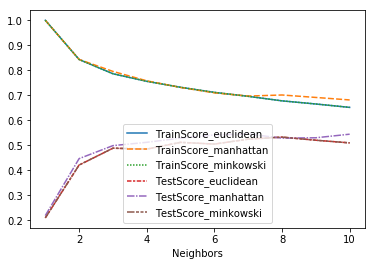

In [24]:
#모델 설명력 그래프  확인 : euclidean
df_score_metric_pivot = df_score_metric.pivot(index='Neighbors',columns='Metric',\
                                             values=['TrainScore','TestScore'])
level0 = df_score_metric_pivot.columns.get_level_values(0)
level1 = df_score_metric_pivot.columns.get_level_values(1)
df_score_metric_pivot.columns = level0 + '_' + level1
sns.lineplot(data=df_score_metric_pivot)

### 3. 결론 도출

In [25]:
knn_final = KNeighborsRegressor(n_neighbors=5, weights='uniform',metric='euclidean')
knn_final.fit(df_train_x, df_train_y)

#train 데이터 설명력
print('Score on training set:{:.3f}'.format(knn_final.score(df_train_x,df_train_y)))
print('Score on test set:{:.3f}'.format(knn_final.score(df_test_x,df_test_y)))

Score on training set:0.732
Score on test set:0.512


다른 예측 모델에 비해 설명력이 낮고 train/test 데이터 간의 설명력 차이도 크다.

In [32]:
## 모델 parameter 조정 추가 : GridSearchCV 를 이용한 최적 parameter 찾기
estimator = KNeighborsRegressor()
param_grid = {'n_neighbors':para_n_neighbors,'weights':para_weights,'metric':para_metric}

grid_dt = GridSearchCV(estimator, param_grid, scoring='r2',n_jobs=-1)
grid_dt.fit(df_train_x,df_train_y)
print('best estimator model:\n{}'.format(grid_dt.best_estimator_))
print('\nbest parameter:\n{}'.format(grid_dt.best_params_))
print('\nbest score:\n{}'.format(grid_dt.best_score_.round(3)))

best estimator model:
KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='manhattan',
          metric_params=None, n_jobs=None, n_neighbors=9, p=2,
          weights='distance')

best parameter:
{'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'}

best score:
0.603


## [실습 : 당뇨병 발병 원인]
당뇨병 발생을 예측하기 위해 KNN분석을 실시하고 결과를 해석하시오.

### 1. 데이터 구성하기

In [33]:
#데이터 불러오기
df_raw = pd.read_csv('/home/pirl/Downloads/data2_py/DIABETES.csv')
df_raw.head()

,Y,AGE,GENDER,BMI,BP,CHOLESTEROL,LDL,HDL,TCH,LTG,GLUCOSE
0,151,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87
1,75,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69
2,141,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85
3,206,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89
4,135,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80


In [34]:
#목표변수, 설명변수 데이터 지정
df_raw_y = df_raw['Y']
df_raw_x = df_raw.drop('Y',axis=1,inplace=False)

In [35]:
#데이터 분할 (train:test = 7:3)
df_train_x,df_test_x,df_train_y,df_test_y = train_test_split(df_raw_x,df_raw_y,
                                                            test_size=0.3)

print("train data X size : {}".format(df_train_x.shape))
print("train data Y size : {}".format(df_train_y.shape))
print("test data X size : {}".format(df_test_x.shape))
print("test data Y size : {}".format(df_test_y.shape))

train data X size : (309, 10)
train data Y size : (309,)
test data X size : (133, 10)
test data Y size : (133,)


### 2. 모델 생성하기

In [36]:
#기본 옵션으로 생성
knn_uncustomized = KNeighborsRegressor()
knn_uncustomized.fit(df_train_x, df_train_y)

#train 데이터 설명력
print('Score on training set: {:.3f}' .format(knn_uncustomized.score(df_train_x, df_train_y)))
#test 데이터 설명력
print('Score on test set: %.3f' %(knn_uncustomized.score(df_test_x, df_test_y)))

Score on training set: 0.461
Score on test set: 0.285


In [37]:
#현재 생성된 트리 모델의 옵션 확인
knn_uncustomized

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=5, p=2,
          weights='uniform')

In [38]:
##모델 parameter 조정 : 이웃 수 증가에 따른 설명력 변화

#train 및 test 설명력 결과 저장
train_score =[]; test_score=[]
#최대 이웃 수 : 1~15
para_n_neighbors = [i for i in range(1,16)]

for v_n_neighbors in para_n_neighbors:
    knn=KNeighborsRegressor(n_neighbors = v_n_neighbors)
    knn.fit(df_train_x,df_train_y)
    train_score.append(knn.score(df_train_x,df_train_y))
    test_score.append(knn.score(df_test_x,df_test_y))

#결과저장
df_score_knn = pd.DataFrame()
df_score_knn['Neighbors'] = para_n_neighbors
df_score_knn['TrainScore'] = train_score
df_score_knn['TestScore'] = test_score

In [39]:
#모델 설명력  확인
df_score_knn.round(3)

,Neighbors,TrainScore,TestScore
0,1,1.000,-0.303
1,2,0.674,0.042
2,3,0.557,0.226
3,4,0.511,0.278
4,5,0.461,0.285
5,6,0.467,0.305
6,7,0.439,0.325
7,8,0.426,0.328
8,9,0.414,0.324
9,10,0.403,0.342


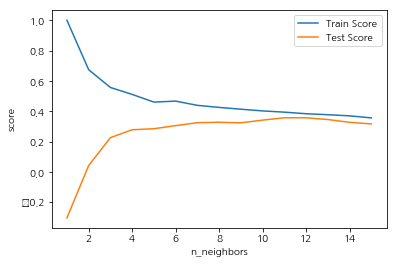

In [40]:
#모델 설명력 그래프 확인
plt.plot(para_n_neighbors, train_score, linestyle='-', label='Train Score')
plt.plot(para_n_neighbors, test_score, linestyle='-', label='Test Score')
plt.ylabel('score');plt.xlabel('n_neighbors')
plt.legend()

K의 증가에 따라 모델의 설명력이 train과 test에 상반되게 나타난다. 두 데이터의 성능 변화를 고려하여 5를 선택한다.

In [41]:
##모델 parameter 조정 : 가중치별 이웃 수 증가에 따른 설명력 변화

#train 및 test 설명력 결과 저장
train_score =[]; test_score=[]
#이웃 수 : 1~10
para_n_neighbors = [i for i in range(1,11)] * 2
#가중치
para_weights = (['uniform']*10)+(['distance']*10)

#zip(list1,list2,...)를 사용하면 list1과 list2의 인덱스별 값을 하나씩 가져옴
for (v_n_neighbors,v_weights) in zip(para_n_neighbors,para_weights):
    knn=KNeighborsRegressor(n_neighbors = v_n_neighbors, weights=v_weights)
    knn.fit(df_train_x,df_train_y)
    train_score.append(knn.score(df_train_x,df_train_y))
    test_score.append(knn.score(df_test_x,df_test_y))

#결과저장
df_score_weight = pd.DataFrame()
df_score_weight['Neighbors'] = para_n_neighbors
df_score_weight['Weights'] = para_weights
df_score_weight['TrainScore'] = train_score
df_score_weight['TestScore'] = test_score

In [42]:
#그림을 그리기 위해 데이터의 형태를 변환
df_score_weight_pivot = df_score_weight.pivot(index='Neighbors',columns='Weights',\
                                             values=['TrainScore','TestScore'])
df_score_weight_pivot.head()

TrainScore           TestScore          
Weights     distance   uniform  distance   uniform
Neighbors                                         
1                1.0  1.000000 -0.302592 -0.302592
2                1.0  0.674048  0.048112  0.042201
3                1.0  0.557048  0.228481  0.226324
4                1.0  0.511236  0.280908  0.278446
5                1.0  0.460613  0.296983  0.285169

In [43]:
#pivot을 이용할 경우, columns와 values이 2개의 level로 이루어지므로 하나의 level로 변환
level0 = df_score_weight_pivot.columns.get_level_values(0)
level1 = df_score_weight_pivot.columns.get_level_values(1)
df_score_weight_pivot.columns = level0 +'_'+level1
df_score_weight_pivot.head()

,TrainScore_distance,TrainScore_uniform,TestScore_distance,TestScore_uniform
Neighbors,,,,
1,1.0,1.000000,-0.302592,-0.302592
2,1.0,0.674048,0.048112,0.042201
3,1.0,0.557048,0.228481,0.226324
4,1.0,0.511236,0.280908,0.278446
5,1.0,0.460613,0.296983,0.285169


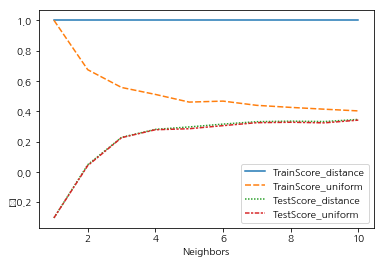

In [44]:
#모델 설명력 그래프 확인
sns.lineplot(data=df_score_weight_pivot)

K의 증가와 가중치 방식에 따라 모델의 설명력이 train 과 test 데이터에서 상반되게 나타난다. (단,distance는 변화 없음)

train/test 데이터의 성능 변화를 고려하여 uniform 을 선택한다.


In [45]:
##모델 parameter 조정 : 거리 계산 방법별 이웃 수 증가에 따른 설명력 ㅂ 녀화

#train 및 test 설명력 결과 저장
train_score =[]; test_score=[]
#이웃 수 : 1~10
para_n_neighbors = [i for i in range(1,11)] * 3
#거리 계산 방법
para_metric = ['minkowski'] * 10 + ['euclidean'] * 10 + ['manhattan'] * 10

for (v_n_neighbors,v_metric) in zip(para_n_neighbors,para_metric):
    knn=KNeighborsRegressor(weights='uniform', \
                            n_neighbors = v_n_neighbors, metric = v_metric)
    knn.fit(df_train_x,df_train_y)
    train_score.append(knn.score(df_train_x,df_train_y))
    test_score.append(knn.score(df_test_x,df_test_y))

#결과저장
df_score_metric = pd.DataFrame()
df_score_metric['Neighbors'] = para_n_neighbors
df_score_metric['Metric'] = para_metric
df_score_metric['TrainScore'] = train_score
df_score_metric['TestScore'] = test_score

In [46]:
#모델 설명력 확인
df_score_metric.round(3)

,Neighbors,Metric,TrainScore,TestScore
0,1,minkowski,1.000,-0.303
1,2,minkowski,0.674,0.042
2,3,minkowski,0.557,0.226
3,4,minkowski,0.511,0.278
4,5,minkowski,0.461,0.285
5,6,minkowski,0.467,0.305
6,7,minkowski,0.439,0.325
7,8,minkowski,0.426,0.328
8,9,minkowski,0.414,0.324
9,10,minkowski,0.403,0.342


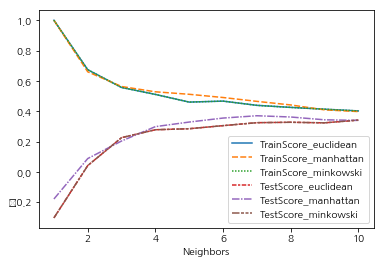

In [47]:
#모델 설명력 그래프  확인 : euclidean
df_score_metric_pivot = df_score_metric.pivot(index='Neighbors',columns='Metric',\
                                             values=['TrainScore','TestScore'])
level0 = df_score_metric_pivot.columns.get_level_values(0)
level1 = df_score_metric_pivot.columns.get_level_values(1)
df_score_metric_pivot.columns = level0 + '_' + level1
sns.lineplot(data=df_score_metric_pivot)

### 3. 결론 도출

In [48]:
knn_final = KNeighborsRegressor(n_neighbors=5, weights='uniform',metric='euclidean')
knn_final.fit(df_train_x, df_train_y)

#train 데이터 설명력
print('Score on training set:{:.3f}'.format(knn_final.score(df_train_x,df_train_y)))
print('Score on test set:{:.3f}'.format(knn_final.score(df_test_x,df_test_y)))

Score on training set:0.461
Score on test set:0.285


In [49]:
## 모델 parameter 조정 추가 : GridSearchCV 를 이용한 최적 parameter 찾기
estimator = KNeighborsRegressor()
param_grid = {'n_neighbors':para_n_neighbors,'weights':para_weights,'metric':para_metric}

grid_dt = GridSearchCV(estimator, param_grid, scoring='r2',n_jobs=-1)
grid_dt.fit(df_train_x,df_train_y)
print('best estimator model:\n{}'.format(grid_dt.best_estimator_))
print('\nbest parameter:\n{}'.format(grid_dt.best_params_))
print('\nbest score:\n{}'.format(grid_dt.best_score_.round(3)))

best estimator model:
KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=10, p=2,
          weights='distance')

best parameter:
{'metric': 'minkowski', 'n_neighbors': 10, 'weights': 'distance'}

best score:
0.272
